# Proof of Concept - Protein Feature Extraction

This notebook will contain the POC for the feature extraction of proteins. The features are already extracted by the Fondant pipeline created for deCYPher.

These features will (currently) be used inside a regression model to predict the `molecular_weight` of a protein.

In [50]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns

In [35]:
# read parquet and save to csv
df = pq.read_table('./data/parquet/').to_pandas()
df.to_csv('./data/csv/data.csv', index=False)

In [36]:
# load csv
df = pd.read_csv('./data/csv/data.csv')

In [37]:
df

,sequence,sequence_checksum,sequence_length,molecular_weight,aromaticity,isoelectric_point,instability_index,gravy,helix,turn,sheet,charge_at_ph7,charge_at_ph5,molar_extinction_coefficient_oxidized,molar_extinction_coefficient_reduced
0,MNQRGMPIQSLVTNVKINRLEENDCIHTRHRVRPGRTDGKNLHAMM...,CRC-94CF2EE011C80480,600,66369.0679,0.060000,5.397908,38.074000,-0.334833,0.385000,0.268333,0.328333,-17.260409,9.933956,54320,55070
1,MRVLCDGSTGYACAKNTRIRFREKVASVLAKIQGYEQTFPHHMPNM...,CRC-747F108552578E1D,420,47355.5634,0.088095,5.392736,42.440000,-0.518333,0.319048,0.283333,0.326190,-16.985081,7.337325,58330,58580
2,MAGLKPEVPLHDGINKFGKSDFAGQEGPKIVTTTDKALLVANGALK...,CRC-68D748EC385E9BEC,400,43254.8112,0.055000,5.964593,38.948025,-0.263750,0.335000,0.322500,0.335000,-6.448485,11.400447,31860,32110
3,MVDLKKELKNFVDSDFPGSPKQEAQGIDVRILLSFNNAAFREALII...,CRC-3B9E0764E7D3C737,550,60158.7220,0.072727,5.349652,38.161636,-0.183273,0.341818,0.296364,0.340000,-12.666847,6.634677,31860,32110
4,MELILAKARLEFECDWGLLMLEPCVPPTKIFADRNYAVGVMFESDK...,CRC-B08C4E4E86E87F17,350,39615.9422,0.091429,4.825028,40.802857,-0.248000,0.380000,0.248571,0.357143,-18.025837,-3.682992,61420,61795


In [38]:
df.shape

(5, 15)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sequence                               5 non-null      object 
 1   sequence_checksum                      5 non-null      object 
 2   sequence_length                        5 non-null      int64  
 3   molecular_weight                       5 non-null      float64
 4   aromaticity                            5 non-null      float64
 5   isoelectric_point                      5 non-null      float64
 6   instability_index                      5 non-null      float64
 7   gravy                                  5 non-null      float64
 8   helix                                  5 non-null      float64
 9   turn                                   5 non-null      float64
 10  sheet                                  5 non-null      float64
 11  charge_at_

In [40]:
df.describe(include='all')

,sequence,sequence_checksum,sequence_length,molecular_weight,aromaticity,isoelectric_point,instability_index,gravy,helix,turn,sheet,charge_at_ph7,charge_at_ph5,molar_extinction_coefficient_oxidized,molar_extinction_coefficient_reduced
count,5,5,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
unique,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MNQRGMPIQSLVTNVKINRLEENDCIHTRHRVRPGRTDGKNLHAMM...,CRC-94CF2EE011C80480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,464.000000,51350.82134,0.073450,5.385983,39.685304,-0.309638,0.352173,0.283820,0.337333,-14.277332,6.324683,47558.000000,47933.000000
std,NaN,NaN,105.971694,11427.39798,0.016275,0.403413,1.890682,0.128512,0.028946,0.028000,0.012350,4.851970,5.917460,14549.657041,14638.861636
min,NaN,NaN,350.000000,39615.94220,0.055000,4.825028,38.074000,-0.518333,0.319048,0.248571,0.326190,-18.025837,-3.682992,31860.000000,32110.000000
25%,NaN,NaN,400.000000,43254.81120,0.060000,5.349652,38.161636,-0.334833,0.335000,0.268333,0.328333,-17.260409,6.634677,31860.000000,32110.000000
50%,NaN,NaN,420.000000,47355.56340,0.072727,5.392736,38.948025,-0.263750,0.341818,0.283333,0.335000,-16.985081,7.337325,54320.000000,55070.000000
75%,NaN,NaN,550.000000,60158.72200,0.088095,5.397908,40.802857,-0.248000,0.380000,0.296364,0.340000,-12.666847,9.933956,58330.000000,58580.000000


In [41]:
df.isnull().sum()

sequence                                 0
sequence_checksum                        0
sequence_length                          0
molecular_weight                         0
aromaticity                              0
isoelectric_point                        0
instability_index                        0
gravy                                    0
helix                                    0
turn                                     0
sheet                                    0
charge_at_ph7                            0
charge_at_ph5                            0
molar_extinction_coefficient_oxidized    0
molar_extinction_coefficient_reduced     0
dtype: int64

## 0.1 Handle inconsistencies

### 0.1.1 Missing values

In [42]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for numerical columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

### 0.1.2 Drop duplicates

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df

,sequence,sequence_checksum,sequence_length,molecular_weight,aromaticity,isoelectric_point,instability_index,gravy,helix,turn,sheet,charge_at_ph7,charge_at_ph5,molar_extinction_coefficient_oxidized,molar_extinction_coefficient_reduced
0,MNQRGMPIQSLVTNVKINRLEENDCIHTRHRVRPGRTDGKNLHAMM...,CRC-94CF2EE011C80480,600,66369.0679,0.060000,5.397908,38.074000,-0.334833,0.385000,0.268333,0.328333,-17.260409,9.933956,54320,55070
1,MRVLCDGSTGYACAKNTRIRFREKVASVLAKIQGYEQTFPHHMPNM...,CRC-747F108552578E1D,420,47355.5634,0.088095,5.392736,42.440000,-0.518333,0.319048,0.283333,0.326190,-16.985081,7.337325,58330,58580
2,MAGLKPEVPLHDGINKFGKSDFAGQEGPKIVTTTDKALLVANGALK...,CRC-68D748EC385E9BEC,400,43254.8112,0.055000,5.964593,38.948025,-0.263750,0.335000,0.322500,0.335000,-6.448485,11.400447,31860,32110
3,MVDLKKELKNFVDSDFPGSPKQEAQGIDVRILLSFNNAAFREALII...,CRC-3B9E0764E7D3C737,550,60158.7220,0.072727,5.349652,38.161636,-0.183273,0.341818,0.296364,0.340000,-12.666847,6.634677,31860,32110
4,MELILAKARLEFECDWGLLMLEPCVPPTKIFADRNYAVGVMFESDK...,CRC-B08C4E4E86E87F17,350,39615.9422,0.091429,4.825028,40.802857,-0.248000,0.380000,0.248571,0.357143,-18.025837,-3.682992,61420,61795


## 0.2 Plotting the data

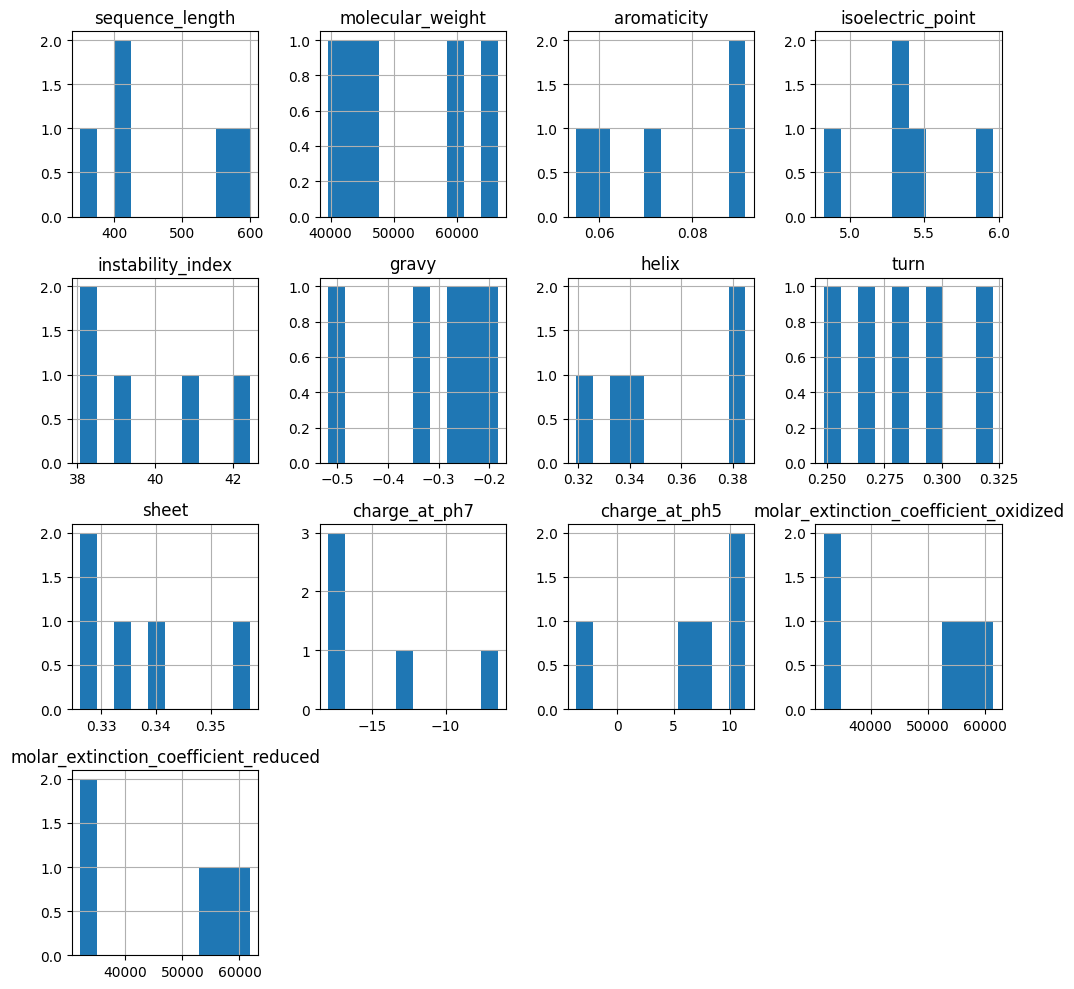

In [48]:
# plot histogram
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

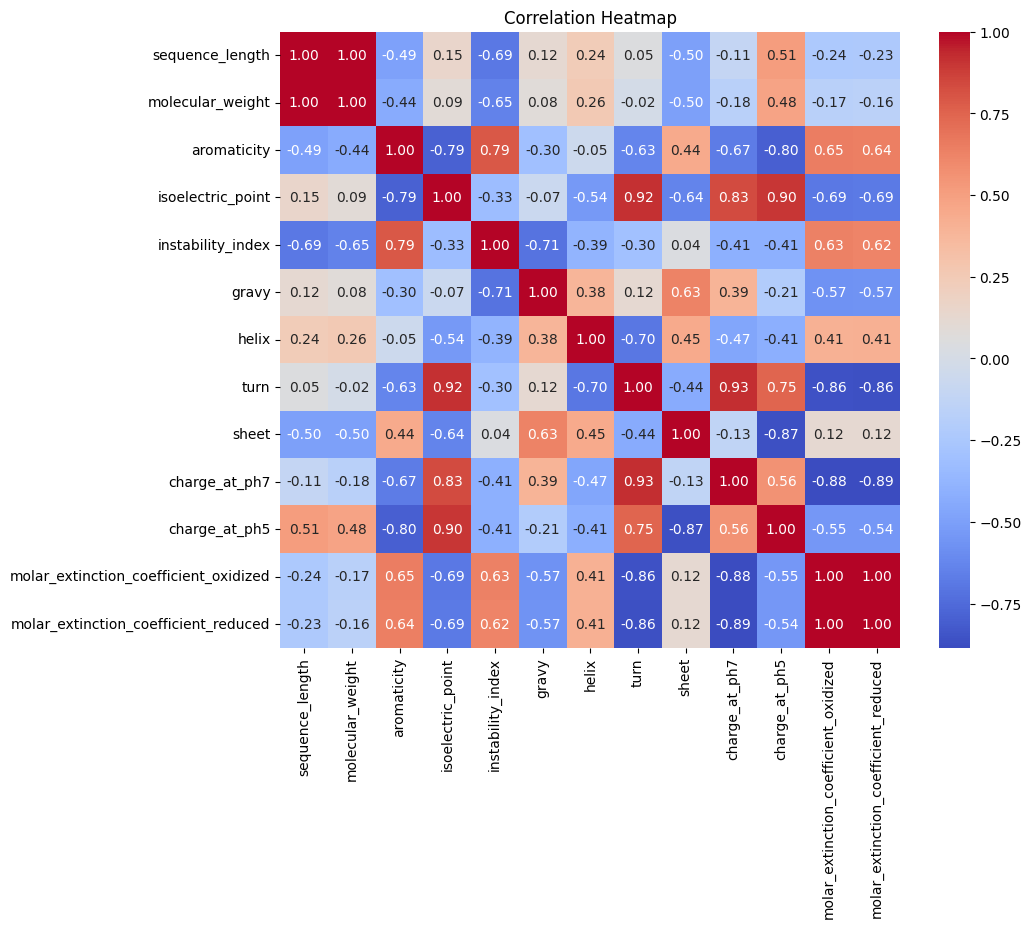

In [55]:
# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 0.3 Store Cleaned Data

In [ ]:
df.to_csv('./data/csv/cleaned_data.csv', index=False)